In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

RANDOM_STATE = 2024

In [2]:
os.chdir('..')
os.getcwd()

'/Users/benmurphy/Projects/nyc'

In [3]:
df = pd.read_csv('cleaned_trip_data.csv', 
                 usecols=[#'pickup_hour', 'pickup_day_of_week', 'rate_code',
                          'trip_time_in_secs', 'passenger_count', 'trip_distance', 
                          'pickup_latitude', 'pickup_longitude',  
                         # 'dropoff_latitude', 'dropoff_longitude',
                          'tip_amount',
                          'fare_amount'
                         ])

df.head()

,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,fare_amount,tip_amount
0,1,437,0.6,-73.978104,40.752968,6.0,1.0
1,1,336,0.5,-73.982315,40.764828,5.5,3.0
2,1,1154,3.3,-73.982010,40.762508,15.0,2.0
3,1,864,3.8,-73.976006,40.744480,14.0,2.9
4,1,902,2.2,-73.952621,40.780964,12.0,2.0


### 5. What features influence fare and tip amounts?
### 6. Can we build a model to predict fare and tip amount?

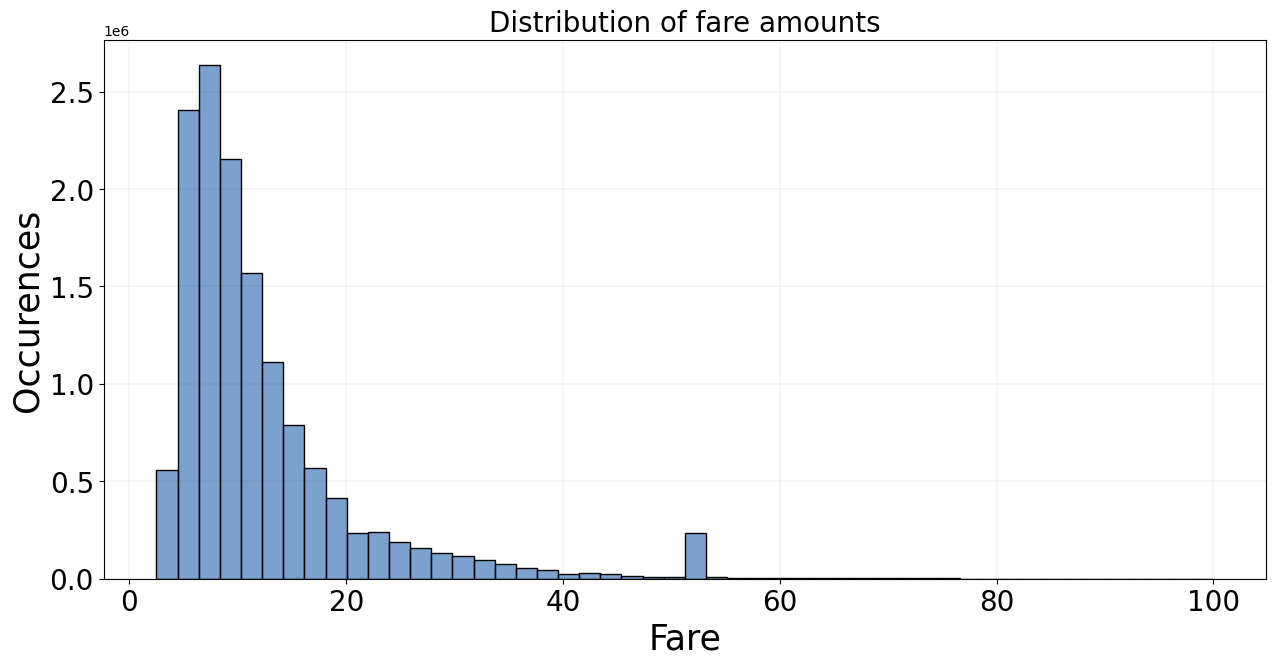

In [4]:
# create a subplot with12 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(15, 7))

sns.histplot(data=df[df['fare_amount']<100],
               x='fare_amount',
               color='#4F82C0',
            bins=50)

ax.axes.set_title("Distribution of fare amounts",fontsize=20)
ax.set_xlabel("Fare",fontsize=25)
ax.set_ylabel("Occurences",fontsize=25)

ax.yaxis.set_tick_params(labelsize = 20);
ax.xaxis.set_tick_params(labelsize = 20);

plt.grid(True, color='black', linewidth=.05)

plt.show()

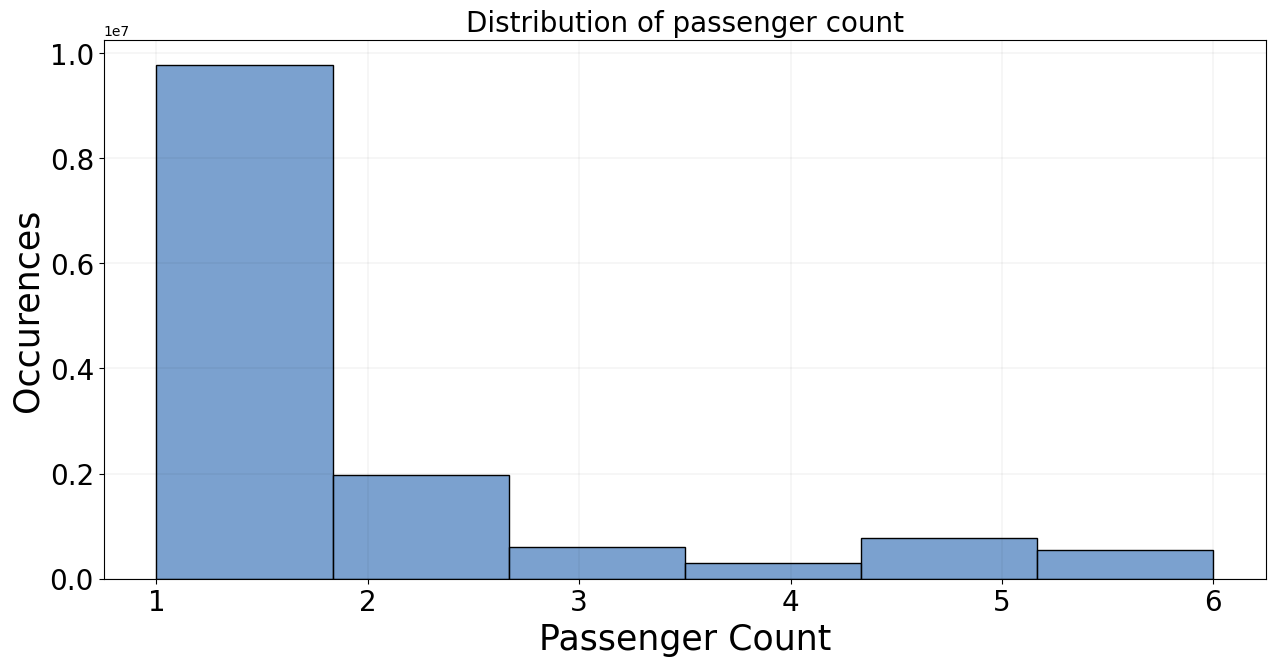

In [5]:
# create a subplot with12 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(15, 7))

sns.histplot(data=df,
               x='passenger_count',
               color='#4F82C0',
                bins=6)

ax.axes.set_title("Distribution of passenger count",fontsize=20)
ax.set_xlabel("Passenger Count",fontsize=25)
ax.set_ylabel("Occurences",fontsize=25)

ax.yaxis.set_tick_params(labelsize = 20);
ax.xaxis.set_tick_params(labelsize = 20);

plt.grid(True, color='black', linewidth=.05)

plt.show()

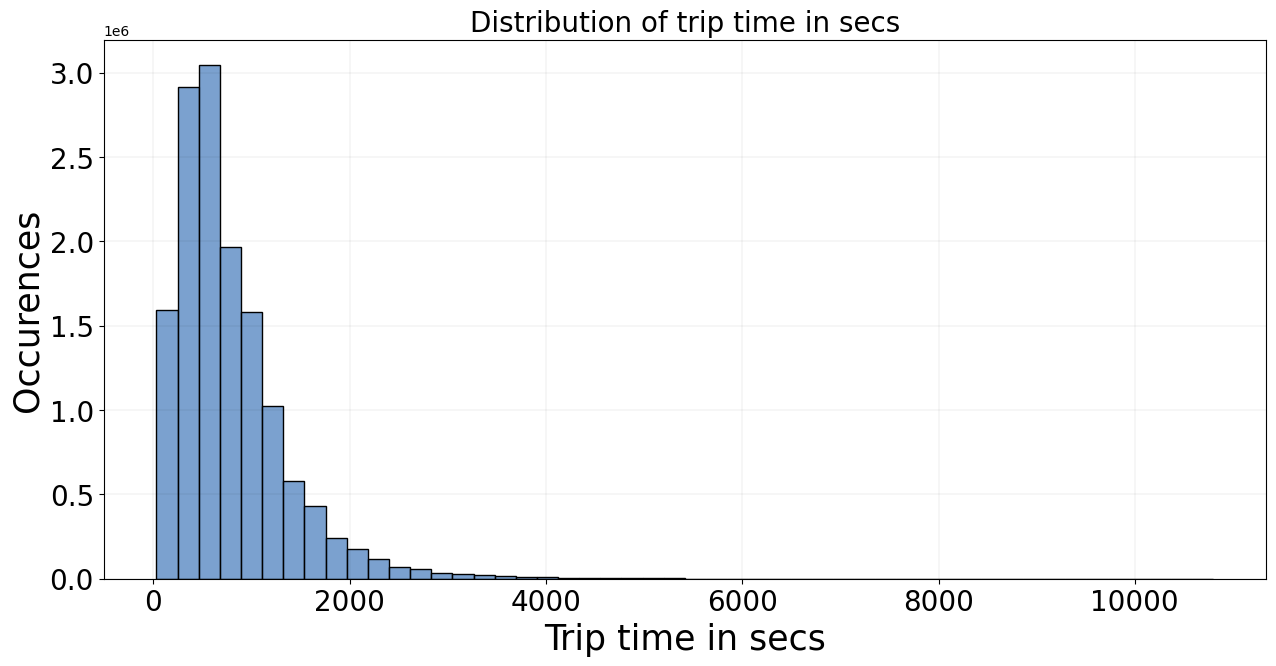

In [6]:
# create a subplot with12 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(15, 7))

sns.histplot(data=df,
               x='trip_time_in_secs',
               color='#4F82C0',
                bins=50)

ax.axes.set_title("Distribution of trip time in secs",fontsize=20)
ax.set_xlabel("Trip time in secs",fontsize=25)
ax.set_ylabel("Occurences",fontsize=25)

ax.yaxis.set_tick_params(labelsize = 20);
ax.xaxis.set_tick_params(labelsize = 20);

plt.grid(True, color='black', linewidth=.05)

plt.show()

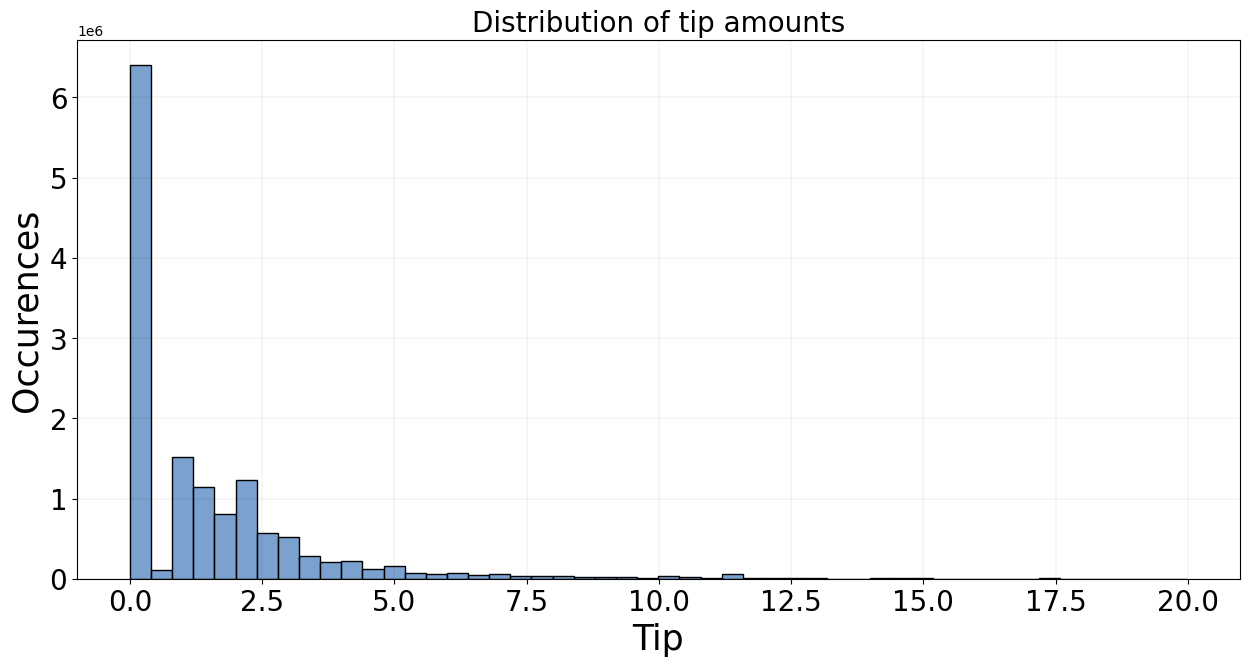

In [81]:
# create a subplot with12 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(15, 7))

sns.histplot(data=df[df['tip_amount']<20],
               x='tip_amount',
               color='#4F82C0',
            bins=50)

ax.axes.set_title("Distribution of tip amounts",fontsize=20)
ax.set_xlabel("Tip",fontsize=25)
ax.set_ylabel("Occurences",fontsize=25)

ax.yaxis.set_tick_params(labelsize = 20);
ax.xaxis.set_tick_params(labelsize = 20);

plt.grid(True, color='black', linewidth=.05)

plt.show()

In [8]:
time_mean = df.trip_time_in_secs.mean()
time_std = df.trip_time_in_secs.std()

trip_dist_mean = df.trip_distance.mean()
trip_dist_std = df.trip_distance.std()

print(time_mean, time_std, trip_dist_mean, trip_dist_std)

778.5689263693946 574.5395110949825 1.705891982085892 1.363889577747389 2.8804849094234033 3.3013340168238146


In [39]:
z_score_outlier = 6

trip_time_outlier_indices = df.loc[df['trip_time_in_secs']>(time_mean+(time_std*z_score_outlier))].index.tolist()
distance_outlier_indices = df.loc[df['trip_distance']>(time_mean+(time_std*z_score_outlier))].index.tolist()
fare_amount_big_outliers = df[df['fare_amount'] > 150].index.tolist()
tip_amount_big_outliers = df[df['tip_amount'] > 100].index.tolist()


indices_to_drop = list(set(trip_time_outlier_indices + 
                           distance_outlier_indices +
                          fare_amount_big_outliers +
                           tip_amount_big_outliers
                          ))

print(f"Distinct rows to be dropped: {len(indices_to_drop)}")

df_outlier_rem = df[~df.index.isin(indices_to_drop)]

print(df_outlier_rem.shape)

Distinct rows to be dropped: 22676
(13917845, 7)


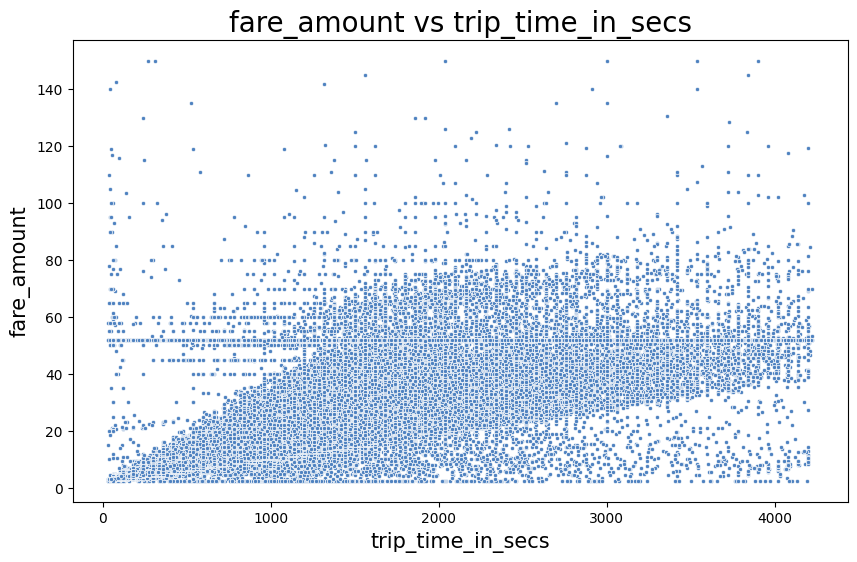

In [40]:
# take a sample of data to plot
X_train, X_test = train_test_split(df_outlier_rem, 
                        # random_state=RANDOM_STATE,
                        test_size=0.1)

fig, ax = plt.subplots(1,1, figsize=(10, 6))

sns.scatterplot(data=X_test,
                x='trip_time_in_secs',
               y='fare_amount',
               color='#4F82C0',
               marker='.')

ax.axes.set_title("fare_amount vs trip_time_in_secs",fontsize=20)
ax.set_xlabel("trip_time_in_secs",fontsize=15)
ax.set_ylabel("fare_amount",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 10);
ax.xaxis.set_tick_params(labelsize = 10);

# plt.grid(True, color='black', linewidth=.05)

plt.show()

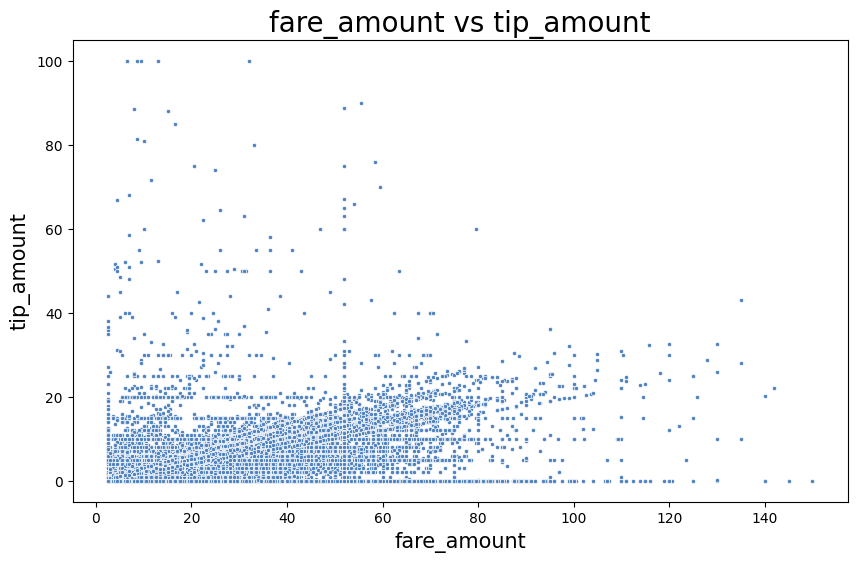

In [41]:
# take a sample of data to plot
X_train, X_test = train_test_split(df_outlier_rem, 
                        # random_state=RANDOM_STATE,
                        test_size=0.1)

fig, ax = plt.subplots(1,1, figsize=(10, 6))

sns.scatterplot(data=X_test,
                x='fare_amount',
               y='tip_amount',
               color='#4F82C0',
               marker='.')

ax.axes.set_title("fare_amount vs tip_amount",fontsize=20)
ax.set_xlabel("fare_amount",fontsize=15)
ax.set_ylabel("tip_amount",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 10);
ax.xaxis.set_tick_params(labelsize = 10);

# plt.grid(True, color='black', linewidth=.05)

plt.show()

In [ ]:
X_train.shape

# Create baseline model for fare_amount with linear regression

In [42]:
X = df_outlier_rem[['passenger_count', 
        'trip_time_in_secs'
       ]].copy()
y = df_outlier_rem['fare_amount']

# split into train test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    random_state=RANDOM_STATE,
                                                    test_size=0.1)

In [43]:
# fit scaler on X_train
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((12526060, 2), (1391785, 2))

In [44]:
# fit linear regression model
reg = LinearRegression().fit(X_train_scaled, y_train)


In [45]:
y_train_preds = reg.predict(X_train_scaled)
train_mae = mean_absolute_error(y_train, y_train_preds)

y_test_preds = reg.predict(X_test_scaled)
test_mae = mean_absolute_error(y_test, y_test_preds)

print(f"Train MAE: {round(train_mae, 3)}")
print(f"Test MAE: {round(test_mae, 3)}")

Train MAE: 2.55
Test MAE: 2.549


In [46]:
y_train_preds = reg.predict(X_train_scaled)
train_mape = mean_absolute_percentage_error(y_train, y_train_preds)

y_test_preds = reg.predict(X_test_scaled)
test_mape = mean_absolute_percentage_error(y_test, y_test_preds)

print(f"Train MAPE: {round(train_mape, 3)}")
print(f"Test MAPE: {round(test_mape, 3)}")

Train MAPE: 0.18
Test MAPE: 0.18


In [47]:
errors = y_test-y_test_preds

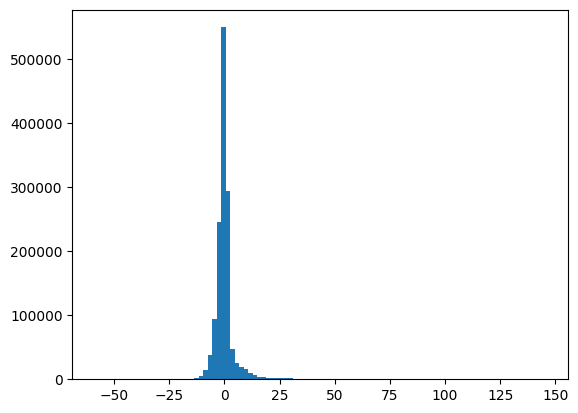

In [48]:
plt.hist(errors, bins=100)
plt.show()

In [49]:
reg.coef_

array([0.00990091, 7.98133304])

In [ ]:
# feature coefficient[1] == 7.981

# changing the inpout variable (trip_time_in_secs) by one standard deviation, 
# results in a fare increase of 7.981

In [53]:
X_train

,passenger_count,trip_time_in_secs
11393231,1,296
990142,1,360
1168953,1,240
2451511,1,645
4951404,6,1260
...,...,...
3612101,1,840
5871141,1,1057
2804324,2,1467
2003764,2,1320


In [50]:
X_train['trip_time_in_secs'].std()

np.float64(547.4624215275827)

In [52]:
reg.intercept_

np.float64(12.29203761038986)

In [66]:
n = np.arange(0, 9, 1)

y_time = (n*reg.coef_[1])+reg.intercept_
x_time = n*(X_train['trip_time_in_secs'].std())


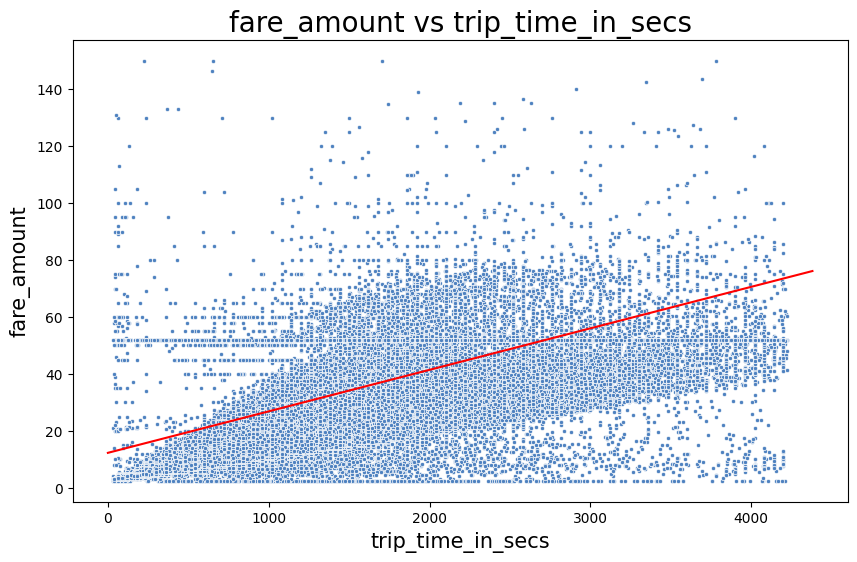

In [67]:
# take a sample of data to plot
X_train, X_test = train_test_split(df_outlier_rem, 
                        # random_state=RANDOM_STATE,
                        test_size=0.1)

fig, ax = plt.subplots(1,1, figsize=(10, 6))

sns.scatterplot(data=X_test,
                x='trip_time_in_secs',
               y='fare_amount',
               color='#4F82C0',
               marker='.')

plt.plot(x_time, y_time, color='r', )

ax.axes.set_title("fare_amount vs trip_time_in_secs",fontsize=20)
ax.set_xlabel("trip_time_in_secs",fontsize=15)
ax.set_ylabel("fare_amount",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 10)
ax.xaxis.set_tick_params(labelsize = 10)

plt.show()

In [68]:
# Tip amount

In [82]:
X = df_outlier_rem[['fare_amount', 
        'trip_distance'
       ]].copy()
y = df_outlier_rem['tip_amount']

# split into train test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    random_state=RANDOM_STATE,
                                                    test_size=0.1)

In [83]:
# fit scaler on X_train
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((12526060, 2), (1391785, 2))

In [84]:
# fit linear regression model
reg = LinearRegression().fit(X_train_scaled, y_train)


In [85]:
y_train_preds = reg.predict(X_train_scaled)
train_mae = mean_absolute_error(y_train, y_train_preds)

y_test_preds = reg.predict(X_test_scaled)
test_mae = mean_absolute_error(y_test, y_test_preds)

print(f"Train MAE: {round(train_mae, 3)}")
print(f"Test MAE: {round(test_mae, 3)}")

Train MAE: 1.257
Test MAE: 1.257


In [96]:
y_train_preds = reg.predict(X_train_scaled)
train_mape = mean_absolute_percentage_error(y_train, y_train_preds)

y_test_preds = reg.predict(X_test_scaled)
test_mape = mean_absolute_percentage_error(y_test, y_test_preds)

print(f"Train MAPE: {round(train_mape, 3)}")
print(f"Test MAPE: {round(test_mape, 3)}")

Train MAPE: 2700256534714566.0
Test MAPE: 2701297653995846.0


In [97]:
reg.coef_

array([1.15854271])

In [105]:
n = np.arange(0, 17, 1)

y_time = (n*reg.coef_[0])+reg.intercept_
x_time = n*(X_train['fare_amount'].std())


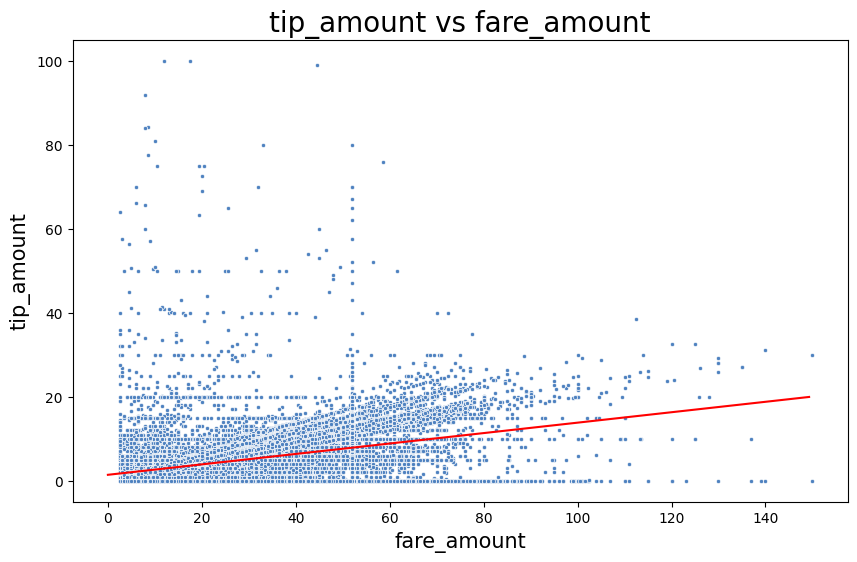

In [106]:
# take a sample of data to plot
X_train, X_test = train_test_split(df_outlier_rem, 
                        # random_state=RANDOM_STATE,
                        test_size=0.1)

fig, ax = plt.subplots(1,1, figsize=(10, 6))

sns.scatterplot(data=X_test,
                x='fare_amount',
               y='tip_amount',
               color='#4F82C0',
               marker='.')

plt.plot(x_time, y_time, color='r', )

ax.axes.set_title("tip_amount vs fare_amount",fontsize=20)
ax.set_xlabel("fare_amount",fontsize=15)
ax.set_ylabel("tip_amount",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 10)
ax.xaxis.set_tick_params(labelsize = 10)

plt.show()

In [100]:
X_train['fare_amount'].std()

np.float64(9.328590840262569)